In [1]:
import requests
import json

def download_data(api_url):
    response = requests.get(api_url)

    if response.status_code == 200:
        try:
            data = json.loads(response.text)
            return data
        except json.JSONDecodeError as e:
            print(f"JSONDecodeError: {e}")
    else:
        print(f"Request failed with status code: {response.status_code}")

    return None

In [2]:
import pandas as pd
lista_dfs=[]
codigos_paises=['arg','chl','mex','col','bra','per','ecu','ury','ven','pry']
for i in codigos_paises:
  api_url = f"https://api.worldbank.org/v2/country/{i}/indicator/EG.ELC.RNEW.ZS?date=1980:2020&format=json"
  data = download_data(api_url)
  df=pd.DataFrame([(x['country']['id'],x['country']['value'],x['countryiso3code'],int(x['date']),round(x['value'],3)) for x in data[1] if x['value']!= None],\
             columns=['Country Code','Country','ISO3CODE','Year','Renewable electricity'])
  lista_dfs.append(df)
  print('Pais :', i, '.... procesado')

Pais : arg .... procesado
Pais : chl .... procesado
Pais : mex .... procesado
Pais : col .... procesado
Pais : bra .... procesado
Pais : per .... procesado
Pais : ecu .... procesado
Pais : ury .... procesado
Pais : ven .... procesado
Pais : pry .... procesado


In [3]:
# concatenar
data_final=pd.concat(lista_dfs)
data_final

,Country Code,Country,ISO3CODE,Year,Renewable electricity
0,AR,Argentina,ARG,2015,28.140
1,AR,Argentina,ARG,2014,31.576
2,AR,Argentina,ARG,2013,31.484
3,AR,Argentina,ARG,2012,29.261
4,AR,Argentina,ARG,2011,32.306
...,...,...,...,...,...
21,PY,Paraguay,PRY,1994,99.981
22,PY,Paraguay,PRY,1993,99.955
23,PY,Paraguay,PRY,1992,99.959
24,PY,Paraguay,PRY,1991,99.963


In [4]:
data_final.dtypes

Country Code              object
Country                   object
ISO3CODE                  object
Year                       int64
Renewable electricity    float64
dtype: object

Documentacion:

Renewable electricity= is the share of electrity generated by renewable power plants in total electricity generated by all types of plants.
Fuente: https://data.worldbank.org/indicator/EG.ELC.RNEW.ZS?view=chart


In [5]:
data_final.Country.unique()

array(['Argentina', 'Chile', 'Mexico', 'Colombia', 'Brazil', 'Peru',
       'Ecuador', 'Uruguay', 'Venezuela, RB', 'Paraguay'], dtype=object)

In [6]:
data_final.isnull().sum()

Country Code             0
Country                  0
ISO3CODE                 0
Year                     0
Renewable electricity    0
dtype: int64

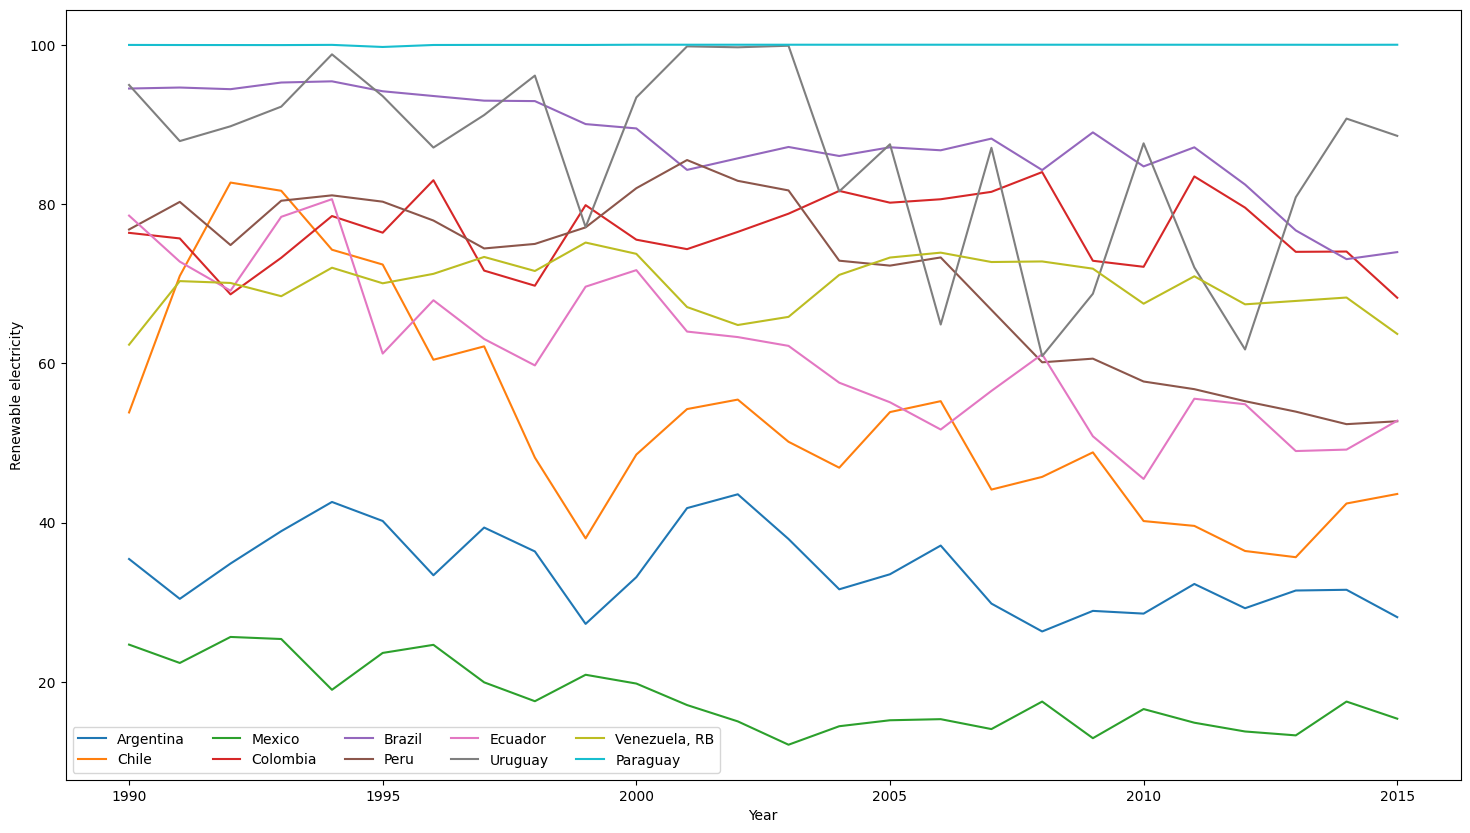

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
sns.lineplot(data=data_final, x='Year',y='Renewable electricity',hue='Country')
plt.legend(loc='lower left',ncols=5)

In [8]:
data_final.groupby(by='Country').mean()['Renewable electricity'].sort_values()

Country
Mexico           18.042000
Argentina        34.008731
Chile            53.297731
Ecuador          61.616077
Venezuela, RB    69.899500
Peru             70.959154
Colombia         76.559115
Uruguay          85.908192
Brazil           87.844500
Paraguay         99.977577
Name: Renewable electricity, dtype: float64